<a href="https://colab.research.google.com/github/skaurl/tourbigdata/blob/master/%EC%8B%A0%ED%95%9C%EC%B9%B4%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df20 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2020.txt", sep = "|", encoding = 'cp949')
df20 = df20[df20['ta_ym'] != 202001]
df20 = df20[df20['gb3'] != "스포츠활동"]
df20 = df20[df20['gb3'] != "취미오락"]
df20['cln_age_r'] = df20['cln_age_r'].astype('object')
df20['ta_ym'] = df20['ta_ym'].astype('object')

df19 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2019.txt", sep = "|", encoding = 'cp949')
df19 = df19[df19['gb3'] != "스포츠활동"]
df19 = df19[df19['gb3'] != "취미오락"]
df19 = df19[df19['ta_ym'] != 201901]
df19 = df19[df19['ta_ym'] != 201907]
df19 = df19[df19['ta_ym'] != 201908]
df19 = df19[df19['ta_ym'] != 201909]
df19 = df19[df19['ta_ym'] != 201910]
df19 = df19[df19['ta_ym'] != 201911]
df19 = df19[df19['ta_ym'] != 201912]
df19['cln_age_r'] = df19['cln_age_r'].astype('object')
df19['ta_ym'] = df19['ta_ym'].astype('object')

df18 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2018.txt", sep = "|", encoding = 'cp949')
df18 = df18[df18['gb3'] != "스포츠활동"]
df18 = df18[df18['gb3'] != "취미오락"]
df18 = df18[df18['ta_ym'] != 201801]
df18 = df18[df18['ta_ym'] != 201807]
df18 = df18[df18['ta_ym'] != 201808]
df18 = df18[df18['ta_ym'] != 201809]
df18 = df18[df18['ta_ym'] != 201810]
df18 = df18[df18['ta_ym'] != 201811]
df18 = df18[df18['ta_ym'] != 201812]
df18['cln_age_r'] = df18['cln_age_r'].astype('object')
df18['ta_ym'] = df18['ta_ym'].astype('object')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(df20.dtypes)
print("v1 : ",len(list(set(df20['v1']))),list(set(df20['v1'])))
print("v2 : ",len(list(set(df20['v2']))),list(set(df20['v2'])))
print("v3 : ",len(list(set(df20['v3']))),list(set(df20['v3'])))
print("gb3 : ",len(list(set(df20['gb3']))),list(set(df20['gb3'])))
print("gb2 : ",len(list(set(df20['gb2']))),list(set(df20['gb2'])))
print("sex_ccd : ",len(list(set(df20['sex_ccd']))),list(set(df20['sex_ccd'])))
print("cln_age_r : ",len(list(set(df20['cln_age_r']))),list(set(df20['cln_age_r'])))
print("ta_ym : ",len(list(set(df20['ta_ym']))),list(set(df20['ta_ym'])))
print("daw_ccd_r : ",len(list(set(df20['daw_ccd_r']))),list(set(df20['daw_ccd_r'])))
print("apv_ts_dl_tm_r : ",len(list(set(df20['apv_ts_dl_tm_r']))),list(set(df20['apv_ts_dl_tm_r'])))

v1                 object
v2                 object
v3                 object
gb3                object
gb2                object
sex_ccd            object
cln_age_r          object
ta_ym              object
daw_ccd_r          object
apv_ts_dl_tm_r     object
vlm               float64
usec                int64
dtype: object
v1 :  17 ['충남', '경북', '전남', '광주', '충북', '울산', '전북', '부산', '경기', '대구', '인천', '강원', '제주', '대전', '세종', '서울', '경남']
v2 :  17 ['충남', '경북', '전남', '광주', '충북', '울산', '전북', '부산', '대구', '경기', '인천', '강원', '제주', '대전', '세종', '서울', '경남']
v3 :  207 ['부평구', '고창군', '양천구', '경산시', '장흥군', '평창군', '군산시', '성동구', '담양군', '괴산군', '미추홀구', '광명시', '양산시', '삼척시', '강남구', '양평군', '광산구', '중랑구', '기장군', '아산시', '울진군', '신안군', '진안군', '진천군', '포항시', '가평군', '광주시', '남동구', '횡성군', '무안군', '서초구', '동대문구', '금산군', '송파구', '의령군', '종로구', '인제군', '사천시', '양구군', '홍성군', '노원구', '영도구', '영등포구', '임실군', '김해시', '부안군', '사상구', '영월군', '충주시', '서귀포시', '도봉구', '고흥군', '화성시', '진도군', '제주시', '하남시', '서천군', '목포시', '강서구', '정읍시', '함안군', '계룡시', '

In [ ]:
print("2020년 2월 ~ 6월 총 취급액",sum(df20['vlm']))
print("2019년 2월 ~ 6월 총 취급액",sum(df19['vlm']))
print("2018년 2월 ~ 6월 총 취급액",sum(df18['vlm']))
print("=======================================")
print("2020년 2월 ~ 6월 총 이용건수",sum(df20['usec']))
print("2019년 2월 ~ 6월 총 이용건수",sum(df19['usec']))
print("2018년 2월 ~ 6월 총 이용건수",sum(df18['usec']))

2020년 2월 ~ 6월 총 취급액 3312473204611.0
2019년 2월 ~ 6월 총 취급액 7445857454611.0
2018년 2월 ~ 6월 총 취급액 7596185646165.0
2020년 2월 ~ 6월 총 이용건수 80338694
2019년 2월 ~ 6월 총 이용건수 156753306
2018년 2월 ~ 6월 총 이용건수 157219450


In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

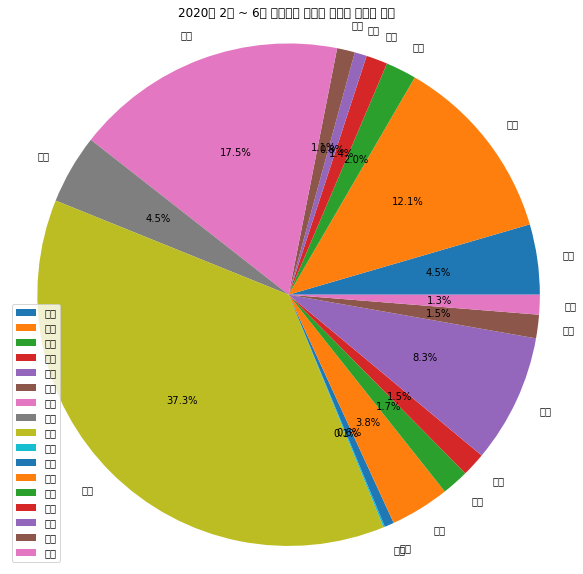

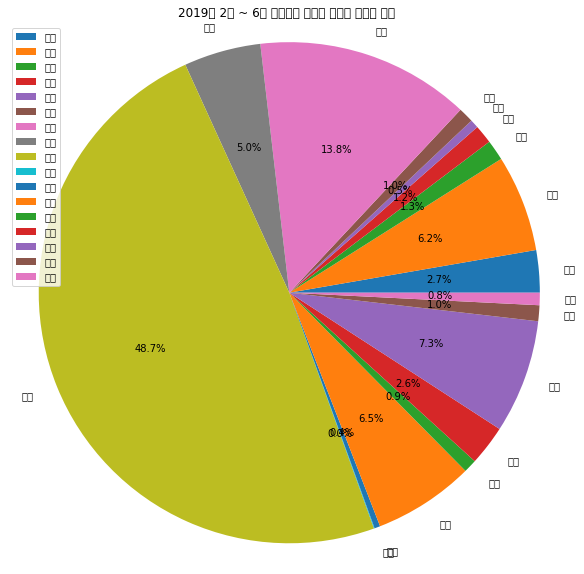

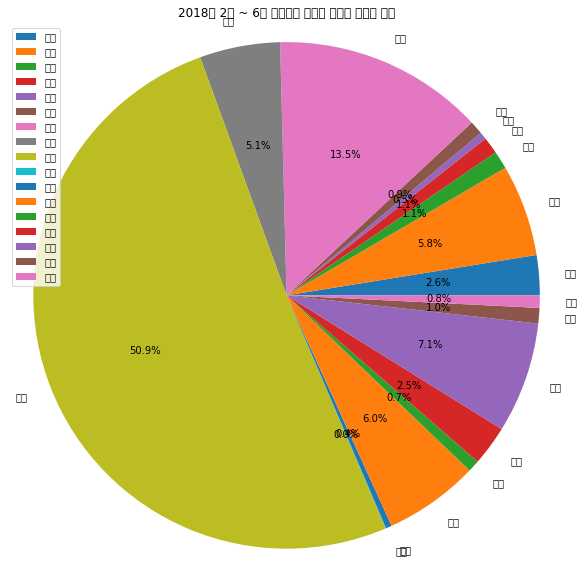

             vlm           vlm           vlm
v2                                          
강원  1.495780e+11  2.032558e+11  1.940394e+11
경기  4.011797e+11  4.643628e+11  4.442986e+11
경남  6.529270e+10  9.855584e+10  8.718256e+10
경북  4.553689e+10  8.988428e+10  8.199965e+10
광주  2.590832e+10  4.089948e+10  3.457280e+10
대구  3.802451e+10  7.299160e+10  6.553879e+10
대전  5.804101e+11  1.029002e+12  1.022434e+12
부산  1.478112e+11  3.696256e+11  3.899451e+11
서울  1.234933e+12  3.624443e+12  3.863088e+12
세종  3.039518e+09  3.222132e+09  2.499357e+09
울산  2.015618e+10  2.759758e+10  2.849662e+10
인천  1.261771e+11  4.846893e+11  4.592926e+11
전남  5.761017e+10  6.343602e+10  5.696740e+10
전북  5.074245e+10  1.924921e+11  1.933734e+11
제주  2.739178e+11  5.459465e+11  5.373600e+11
충남  5.013780e+10  7.608097e+10  7.510020e+10
충북  4.201743e+10  5.937294e+10  5.999714e+10


In [ ]:
v2 = df20.groupby(df20['v2']).sum()

categories = v2.index

plt.pie(v2.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 2월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

v2 = pd.concat([v2,df19.groupby(df19['v2']).sum()], axis=1)

categories = v2.index

plt.pie(v2.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 2월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

v2 = pd.concat([v2,df18.groupby(df18['v2']).sum()], axis=1)

categories = v2.index

plt.pie(v2.iloc[:,4], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2018년 2월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

print(v2.iloc[:,[0,2,4]])

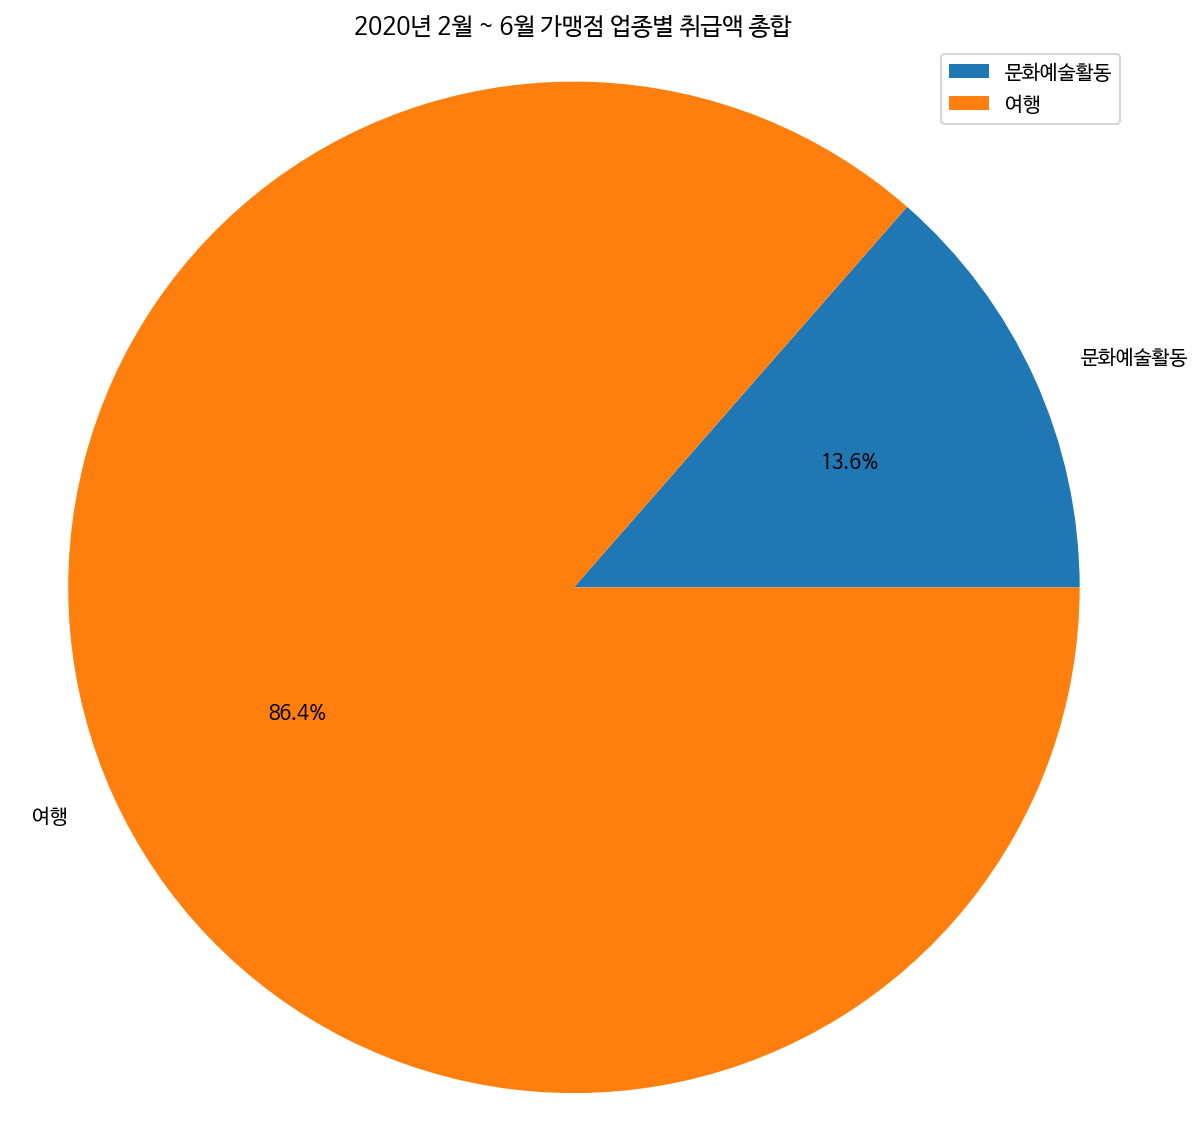

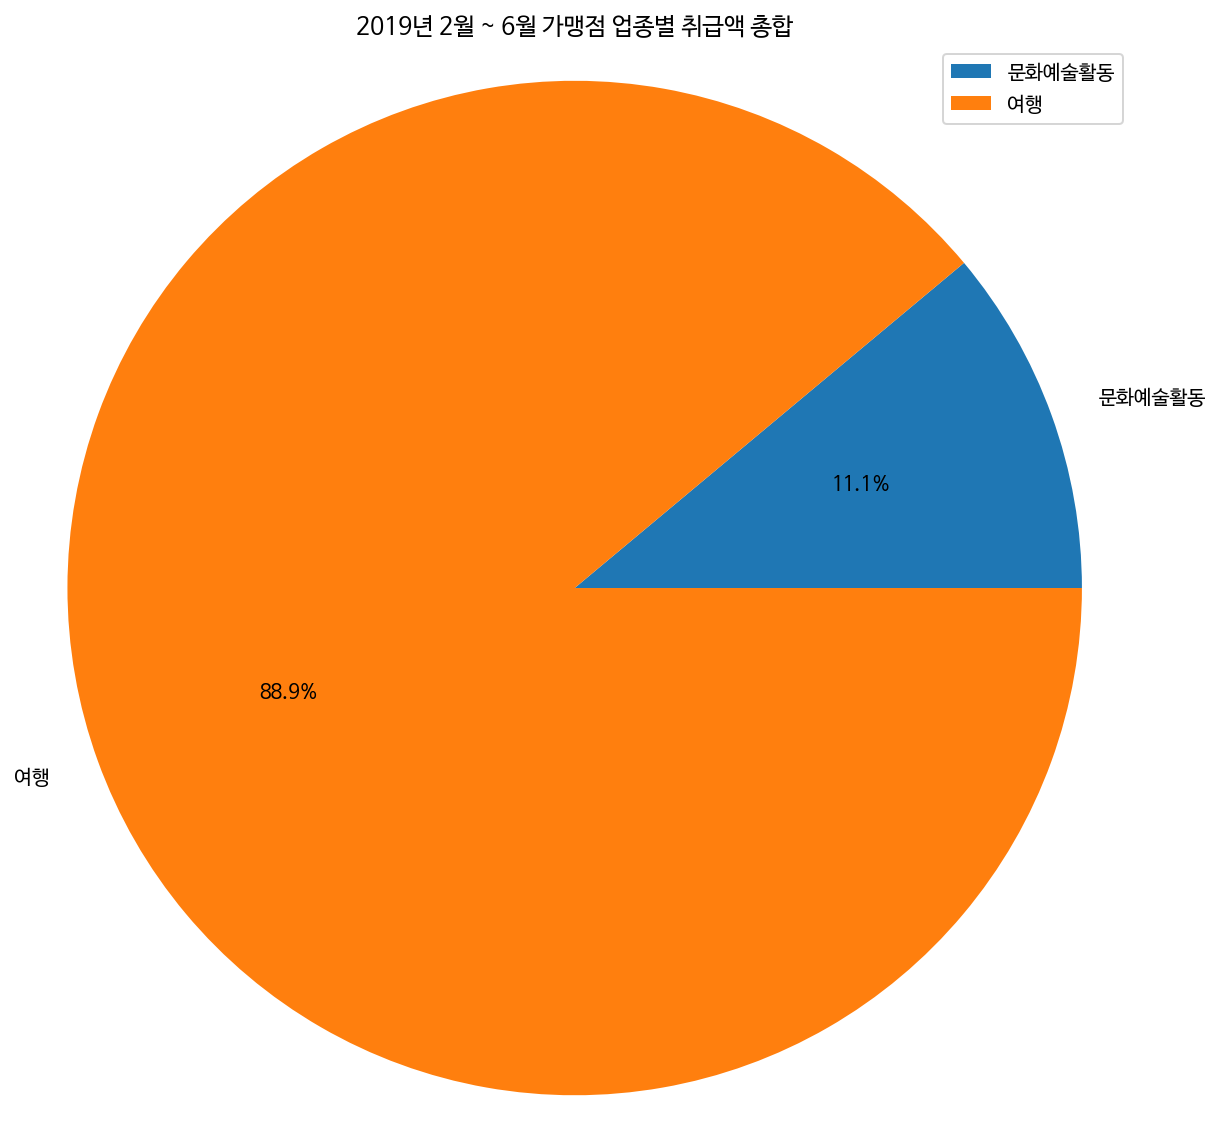

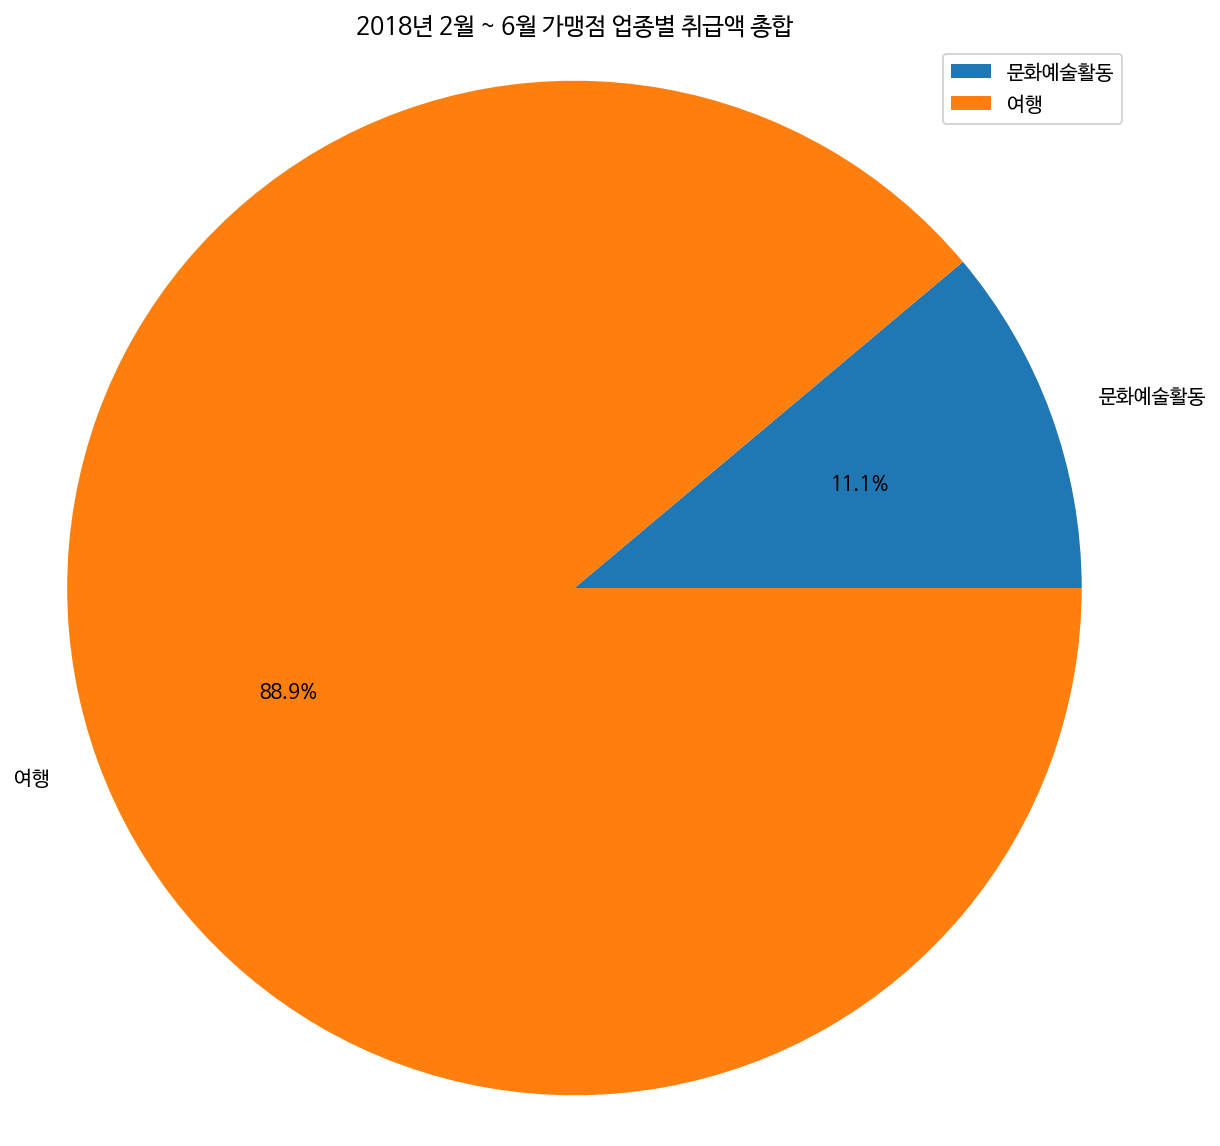

                 vlm           vlm           vlm
gb3                                             
문화예술활동  4.490015e+11  8.245324e+11  8.446608e+11
여행      2.863472e+12  6.621325e+12  6.751525e+12


In [ ]:
gb3 = df20.groupby(df20['gb3']).sum()

categories = gb3.index

plt.pie(gb3.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 2월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

gb3 = pd.concat([gb3,df19.groupby(df19['gb3']).sum()], axis=1)

categories = gb3.index

plt.pie(gb3.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 2월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

gb3 = pd.concat([gb3,df18.groupby(df18['gb3']).sum()], axis=1)

categories = gb3.index

plt.pie(gb3.iloc[:,4], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2018년 2월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

print(gb3.iloc[:,[0,2,4]])

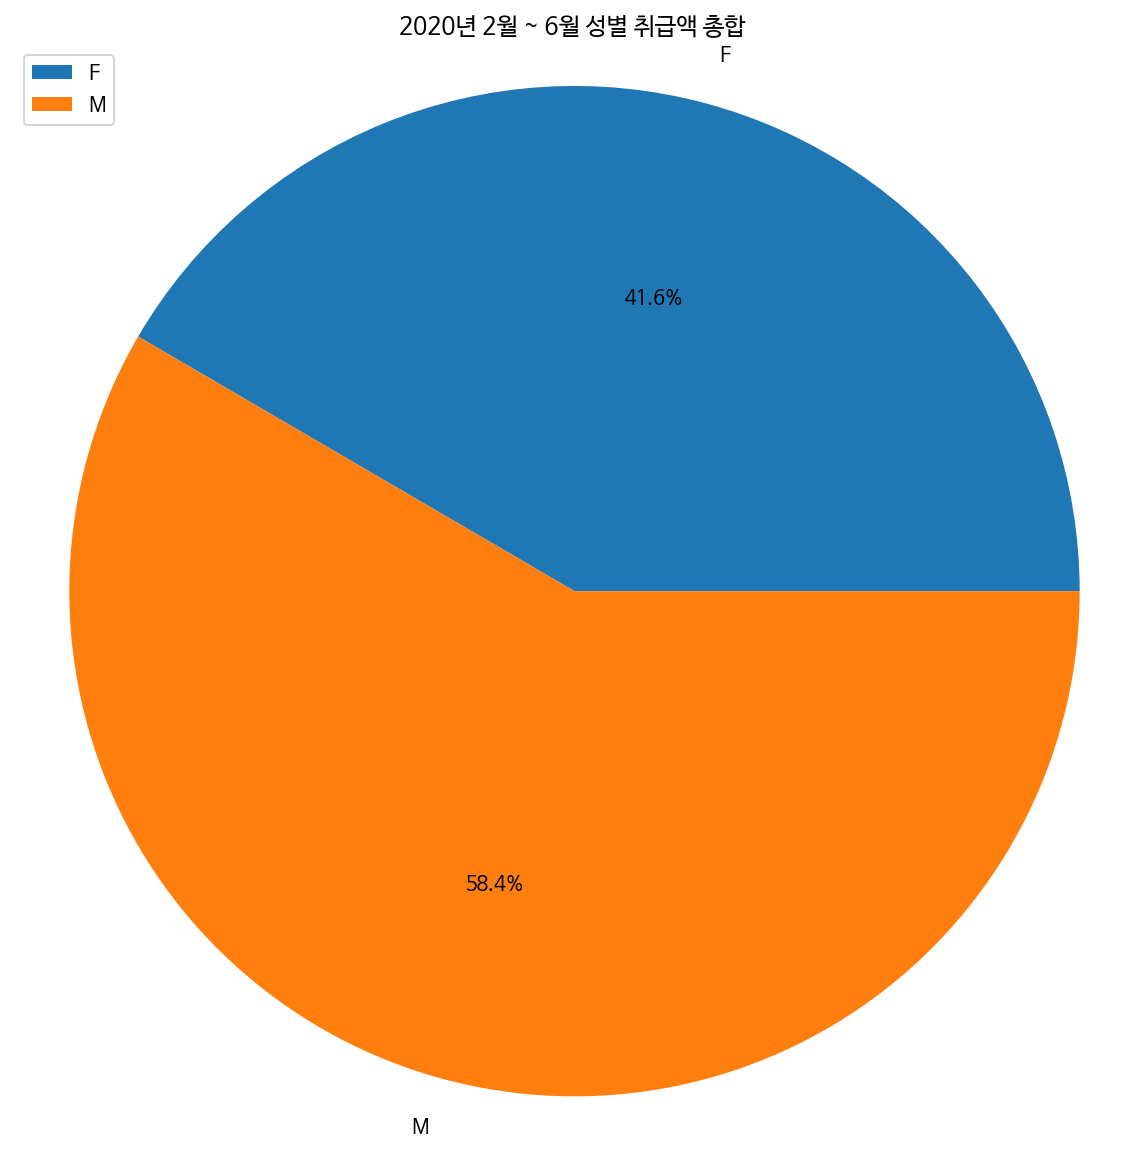

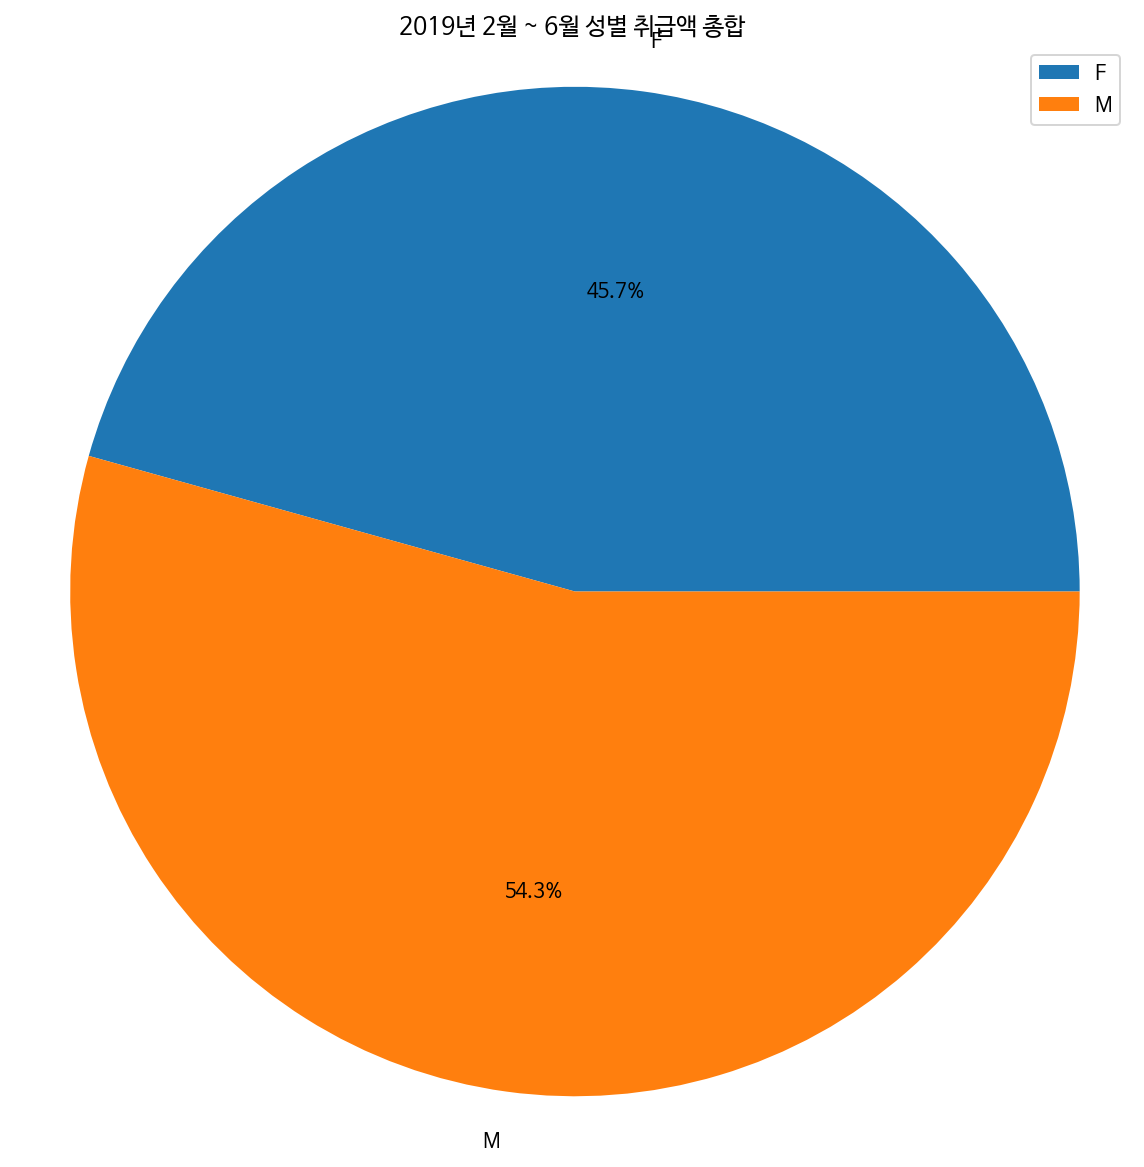

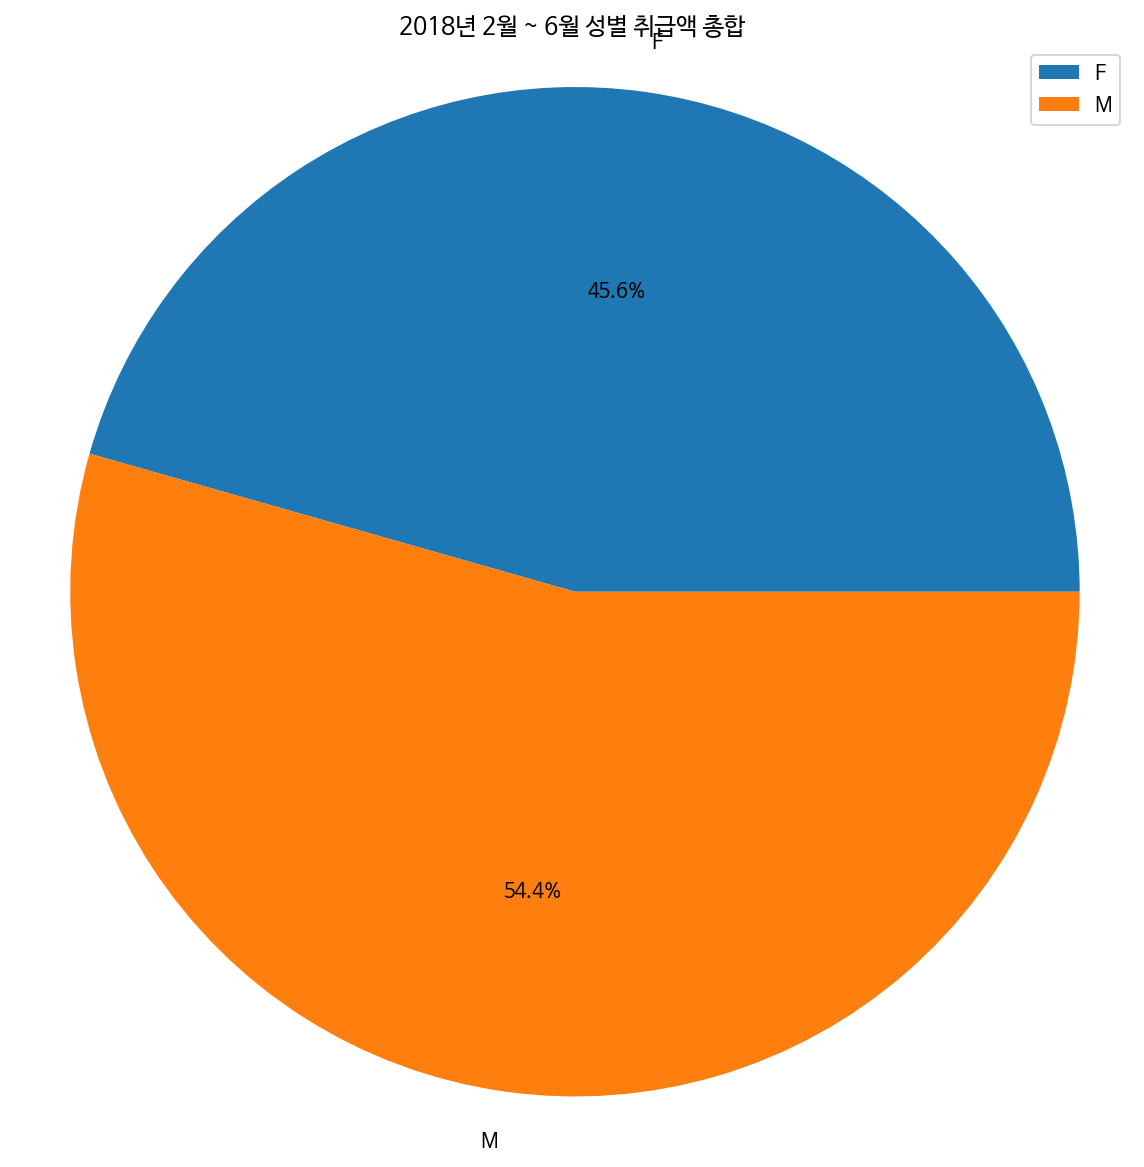

                  vlm           vlm           vlm
sex_ccd                                          
F        1.377774e+12  3.400493e+12  3.462999e+12
M        1.934700e+12  4.045365e+12  4.133186e+12


In [ ]:
sex_ccd = df20.groupby(df20['sex_ccd']).sum()

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 2월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

sex_ccd = pd.concat([sex_ccd,df19.groupby(df19['sex_ccd']).sum()], axis=1)

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 2월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

sex_ccd = pd.concat([sex_ccd,df18.groupby(df18['sex_ccd']).sum()], axis=1)

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,4], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2018년 2월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

print(sex_ccd.iloc[:,[0,2,4]])

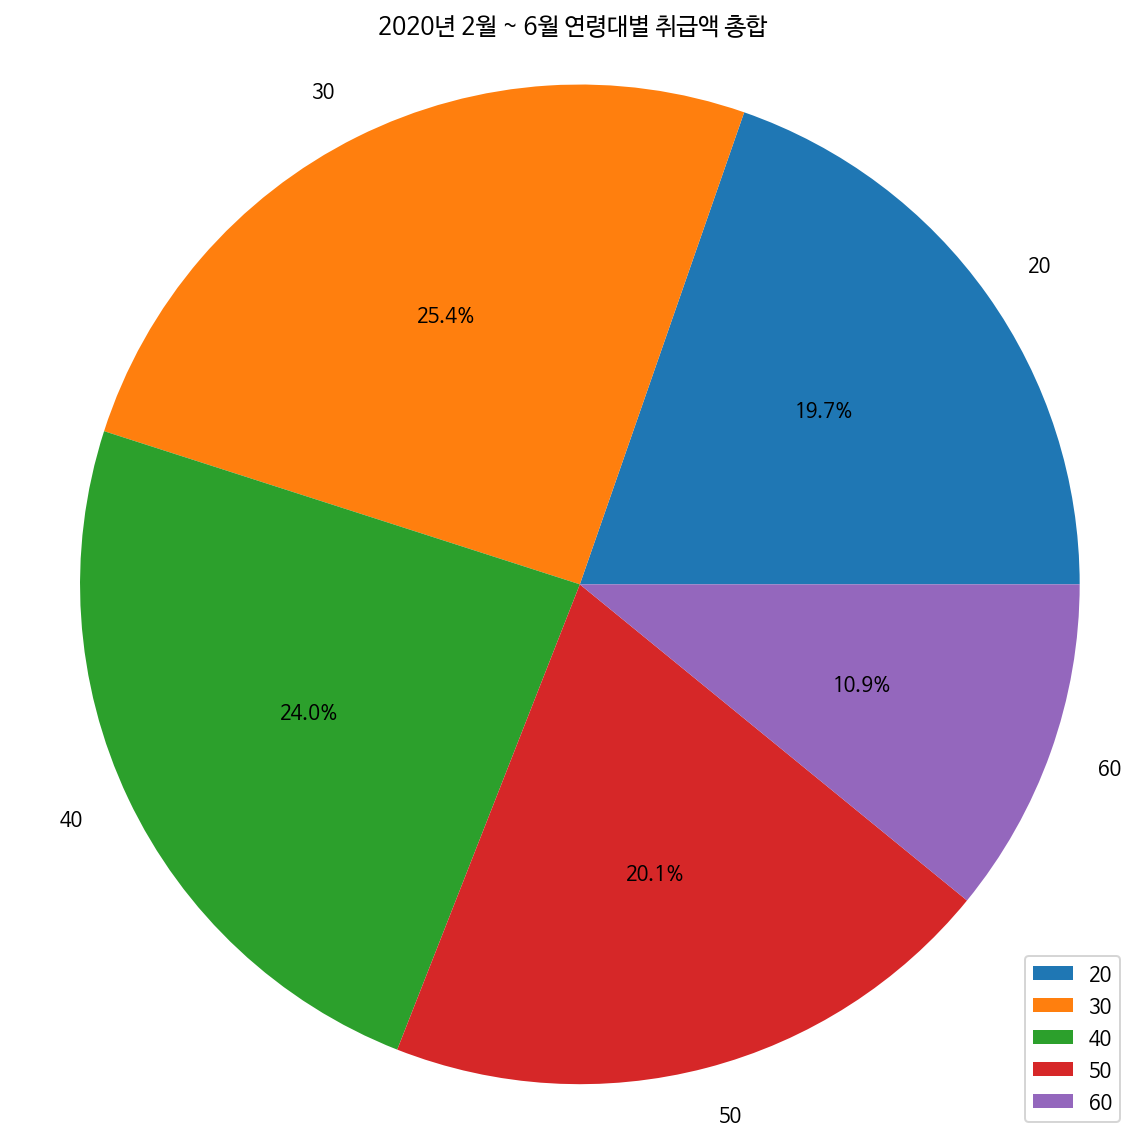

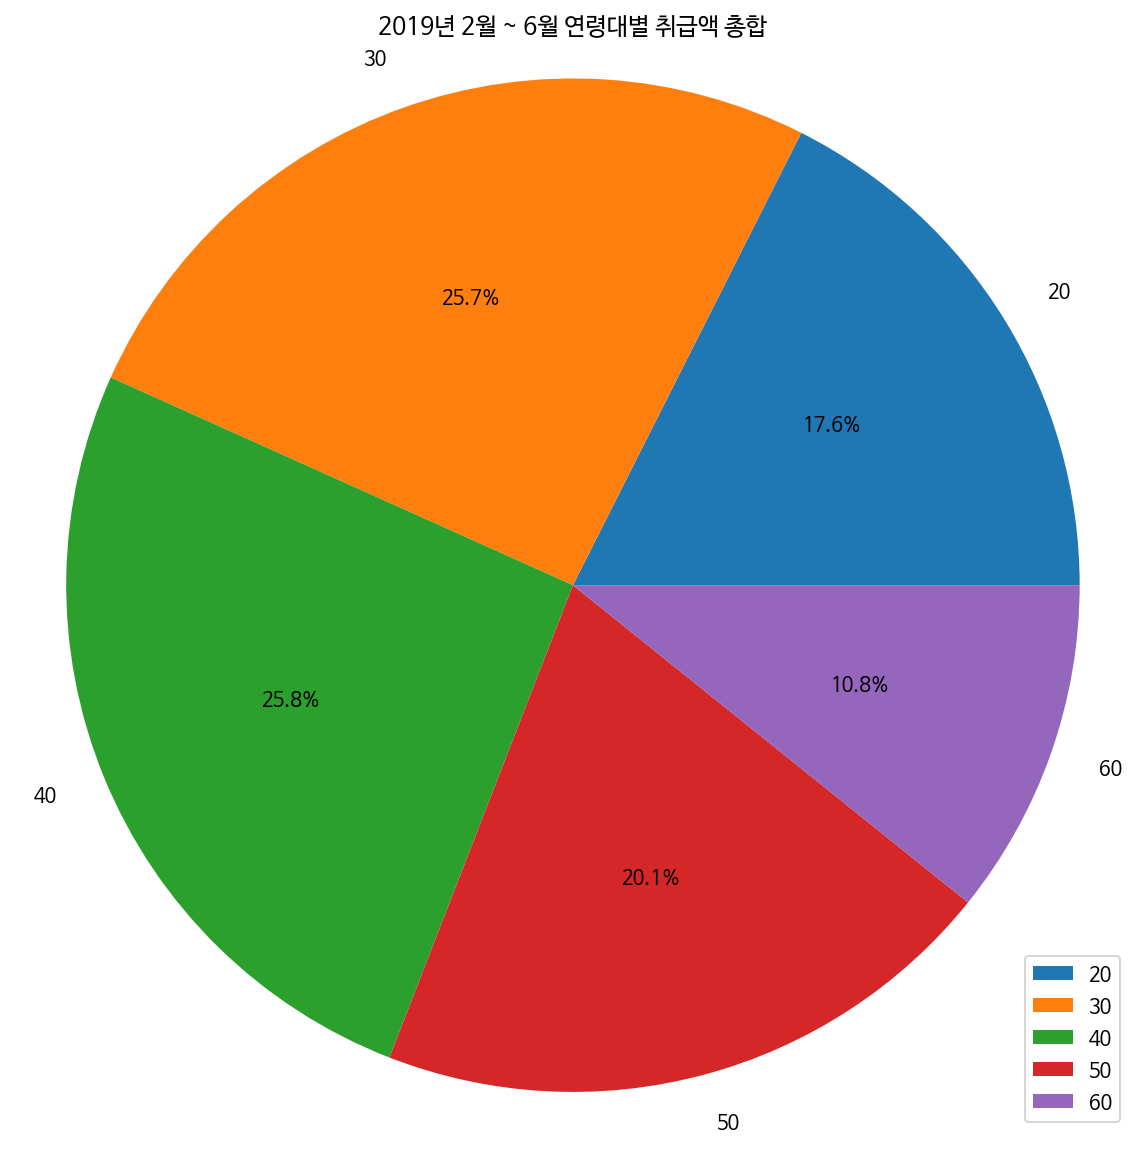

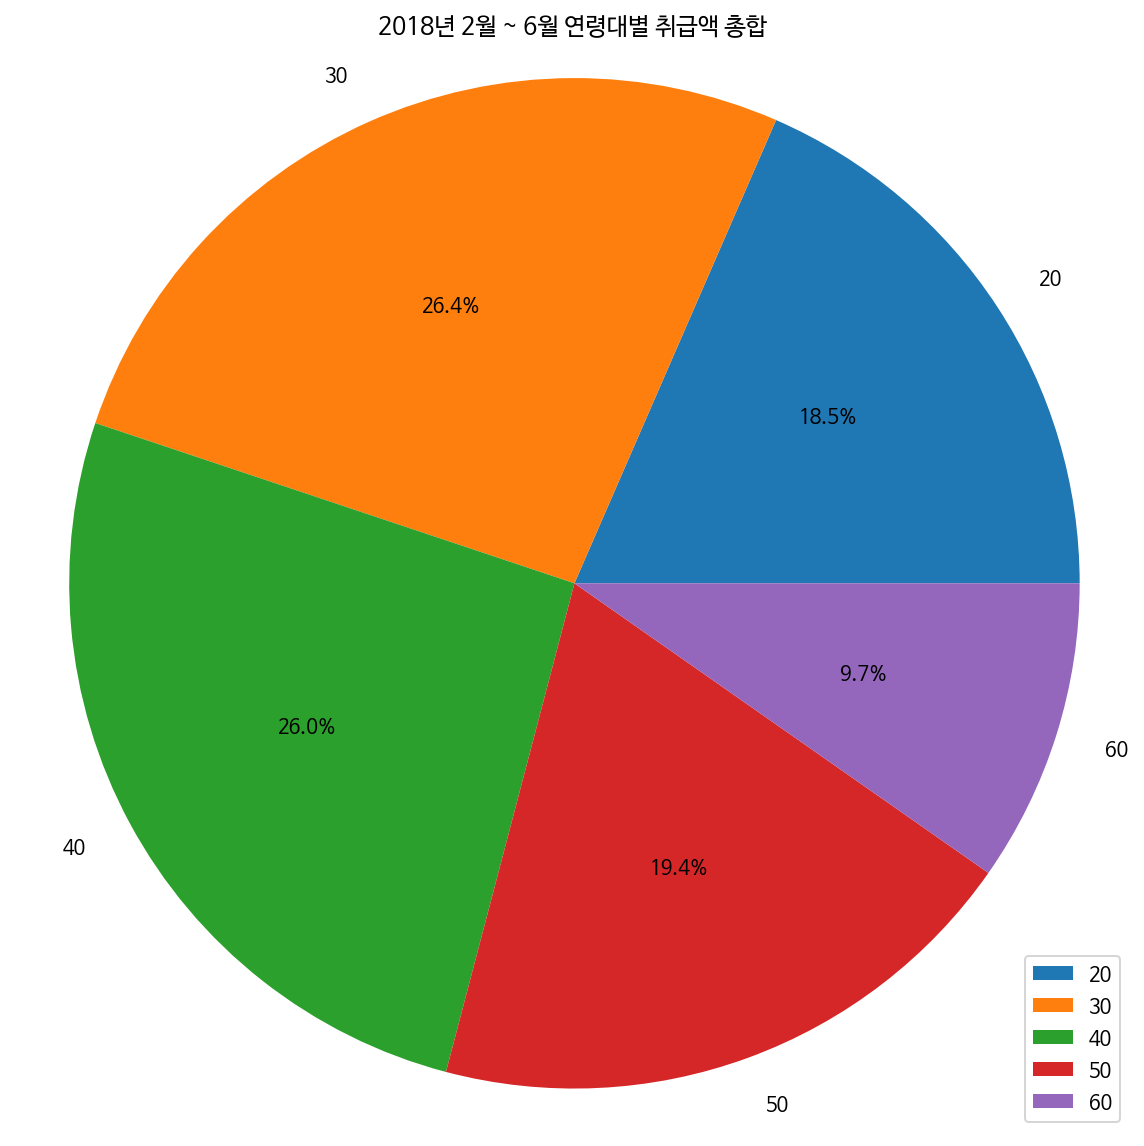

                    vlm           vlm           vlm
cln_age_r                                          
20         6.515043e+11  1.307450e+12  1.402667e+12
30         8.405088e+11  1.915028e+12  2.005136e+12
40         7.951594e+11  1.922779e+12  1.978480e+12
50         6.642978e+11  1.498821e+12  1.471776e+12
60         3.610029e+11  8.017796e+11  7.381268e+11


In [ ]:
cln_age_r = df20.groupby(df20['cln_age_r']).sum()

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 2월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

cln_age_r = pd.concat([cln_age_r,df19.groupby(df19['cln_age_r']).sum()], axis=1)

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 2월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

cln_age_r = pd.concat([cln_age_r,df18.groupby(df18['cln_age_r']).sum()], axis=1)

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,4], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2018년 2월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

print(cln_age_r.iloc[:,[0,2,4]])

In [ ]:
ta_ym = pd.concat([df18.groupby(df18['ta_ym']).sum(),df19.groupby(df19['ta_ym']).sum(),df20.groupby(df20['ta_ym']).sum()],axis=0)

print(ta_ym.iloc[:,0])

ta_ym
201802    1.406079e+12
201803    1.414451e+12
201804    1.520443e+12
201805    1.640116e+12
201806    1.615096e+12
201902    1.415804e+12
201903    1.413675e+12
201904    1.466094e+12
201905    1.603153e+12
201906    1.547131e+12
202002    7.956085e+11
202003    4.758509e+11
202004    5.399664e+11
202005    7.514031e+11
202006    7.496444e+11
Name: vlm, dtype: float64


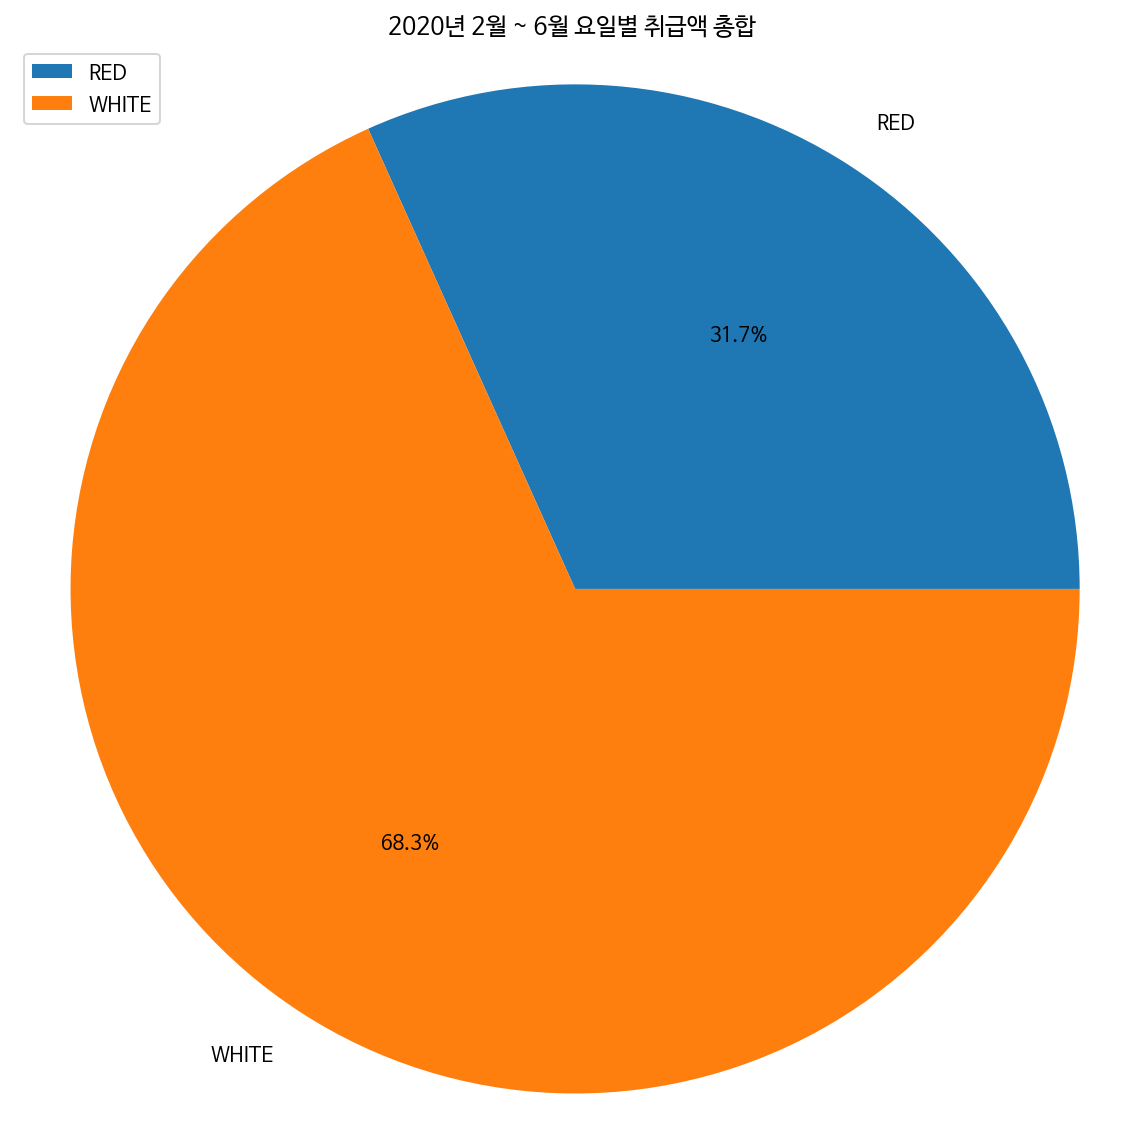

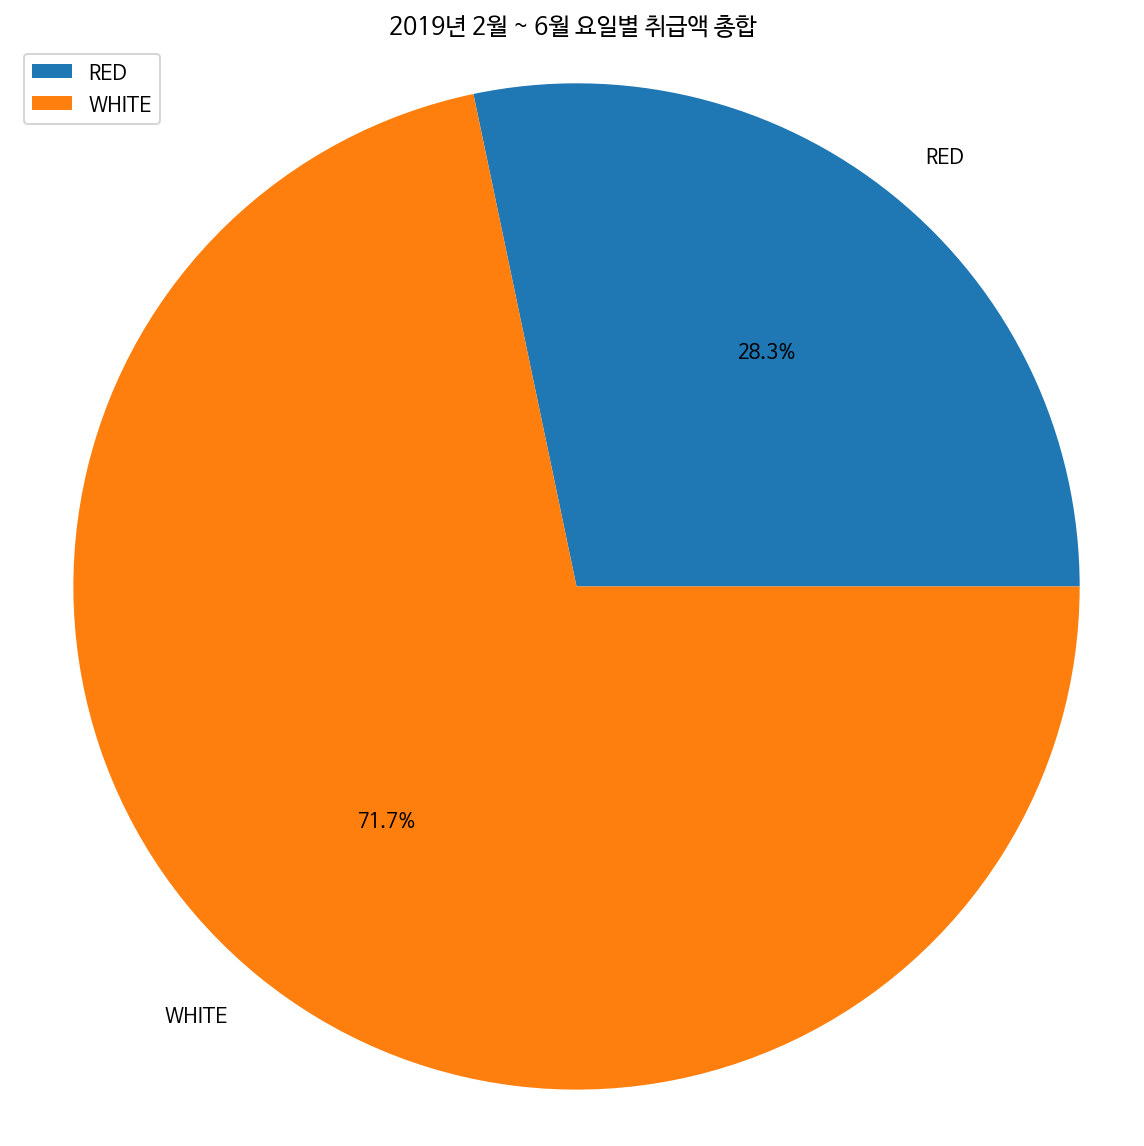

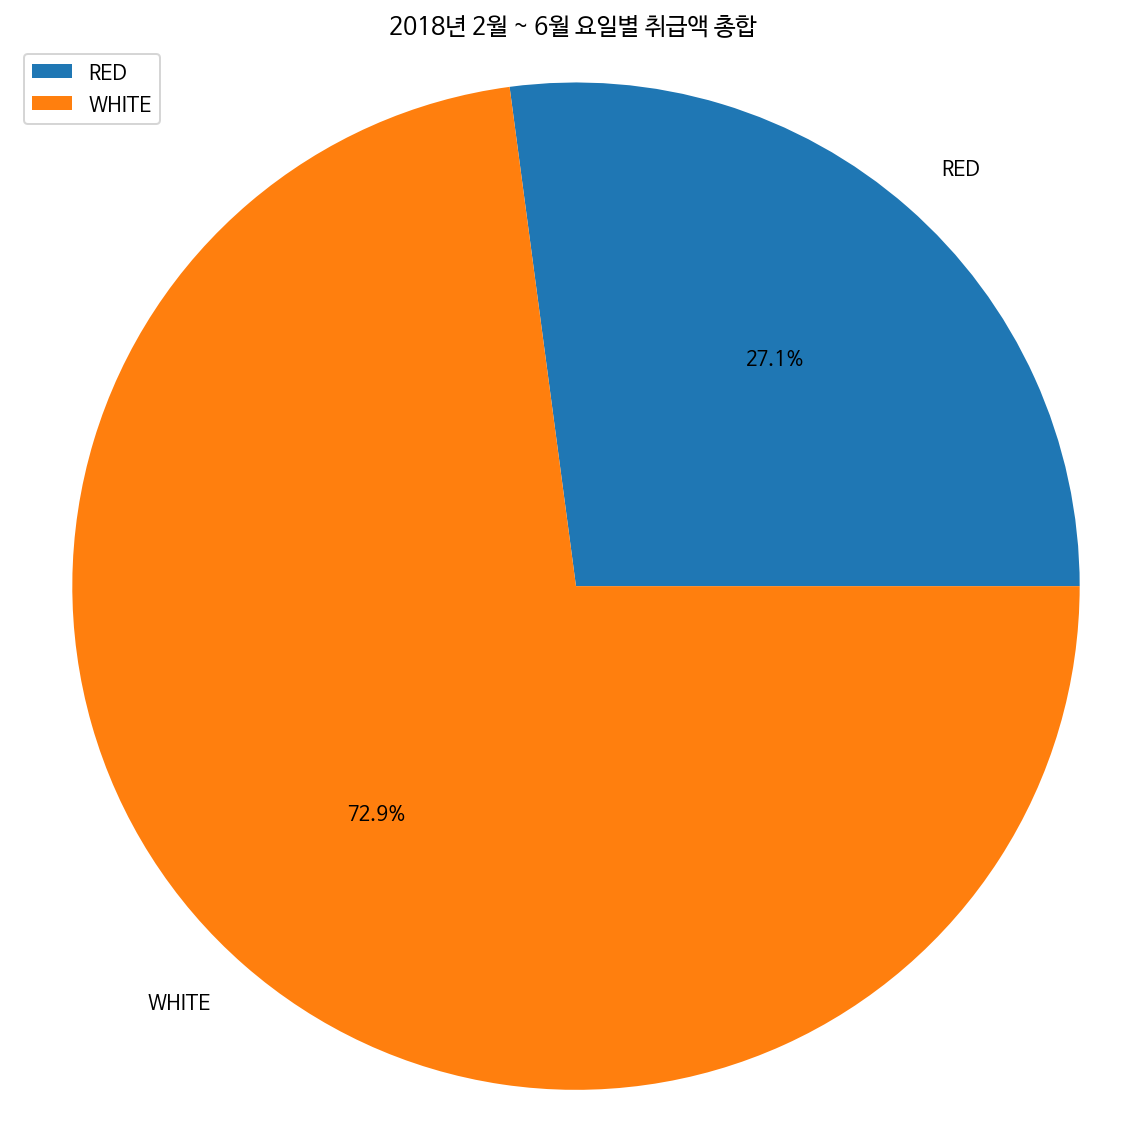

                    vlm           vlm           vlm
daw_ccd_r                                          
RED        1.050946e+12  2.106092e+12  2.058941e+12
WHITE      2.261527e+12  5.339765e+12  5.537244e+12


In [ ]:
daw_ccd_r = df20.groupby(df20['daw_ccd_r']).sum()

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 2월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

daw_ccd_r = pd.concat([daw_ccd_r,df19.groupby(df19['daw_ccd_r']).sum()], axis=1)

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 2월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

daw_ccd_r = pd.concat([daw_ccd_r,df18.groupby(df18['daw_ccd_r']).sum()], axis=1)

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,4], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2018년 2월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

print(daw_ccd_r.iloc[:,[0,2,4]])

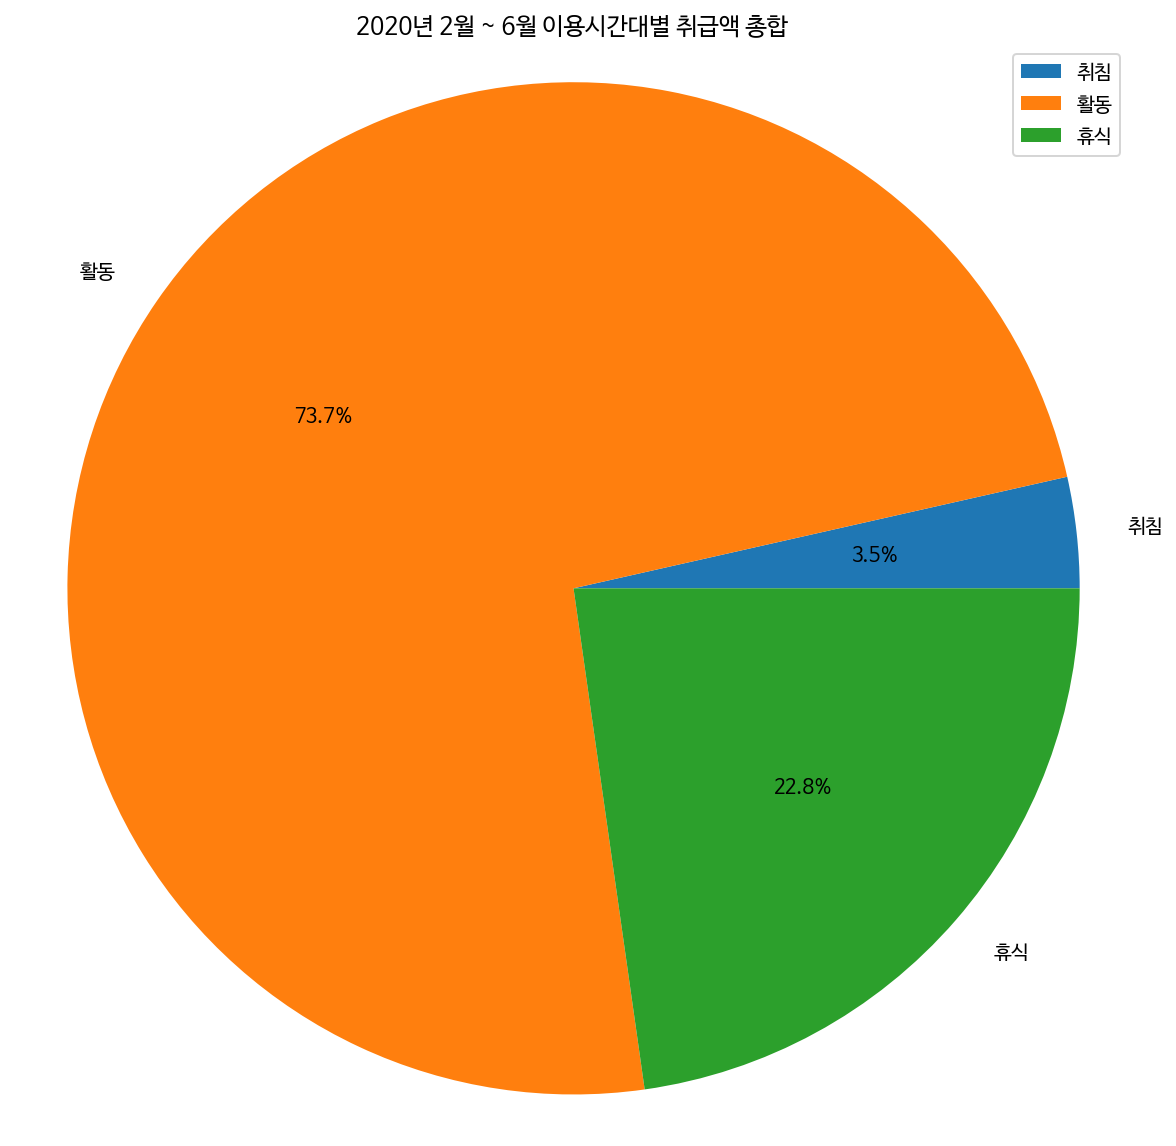

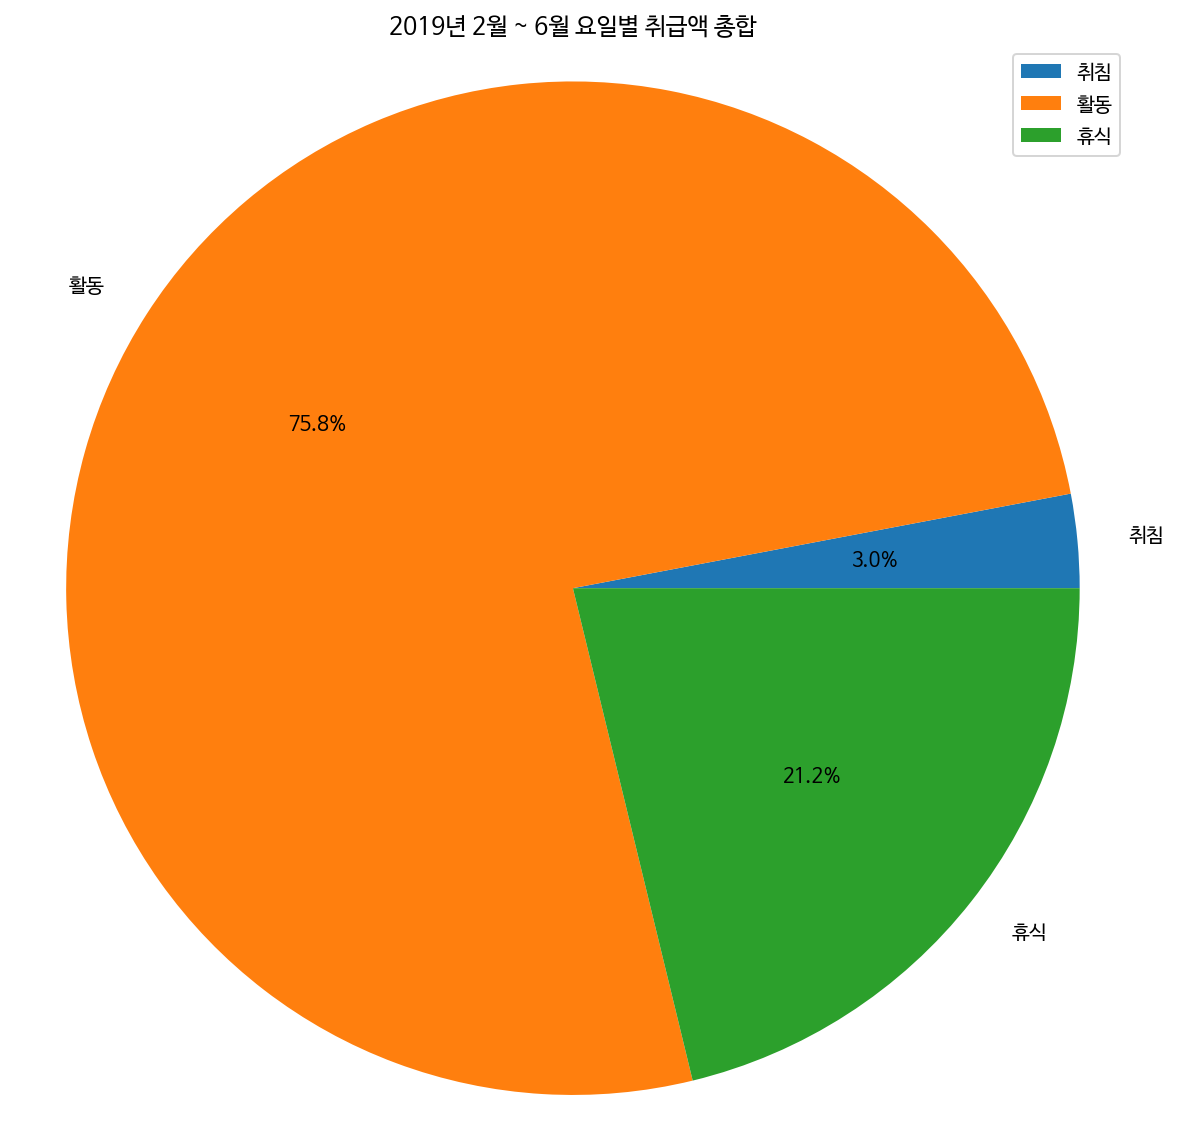

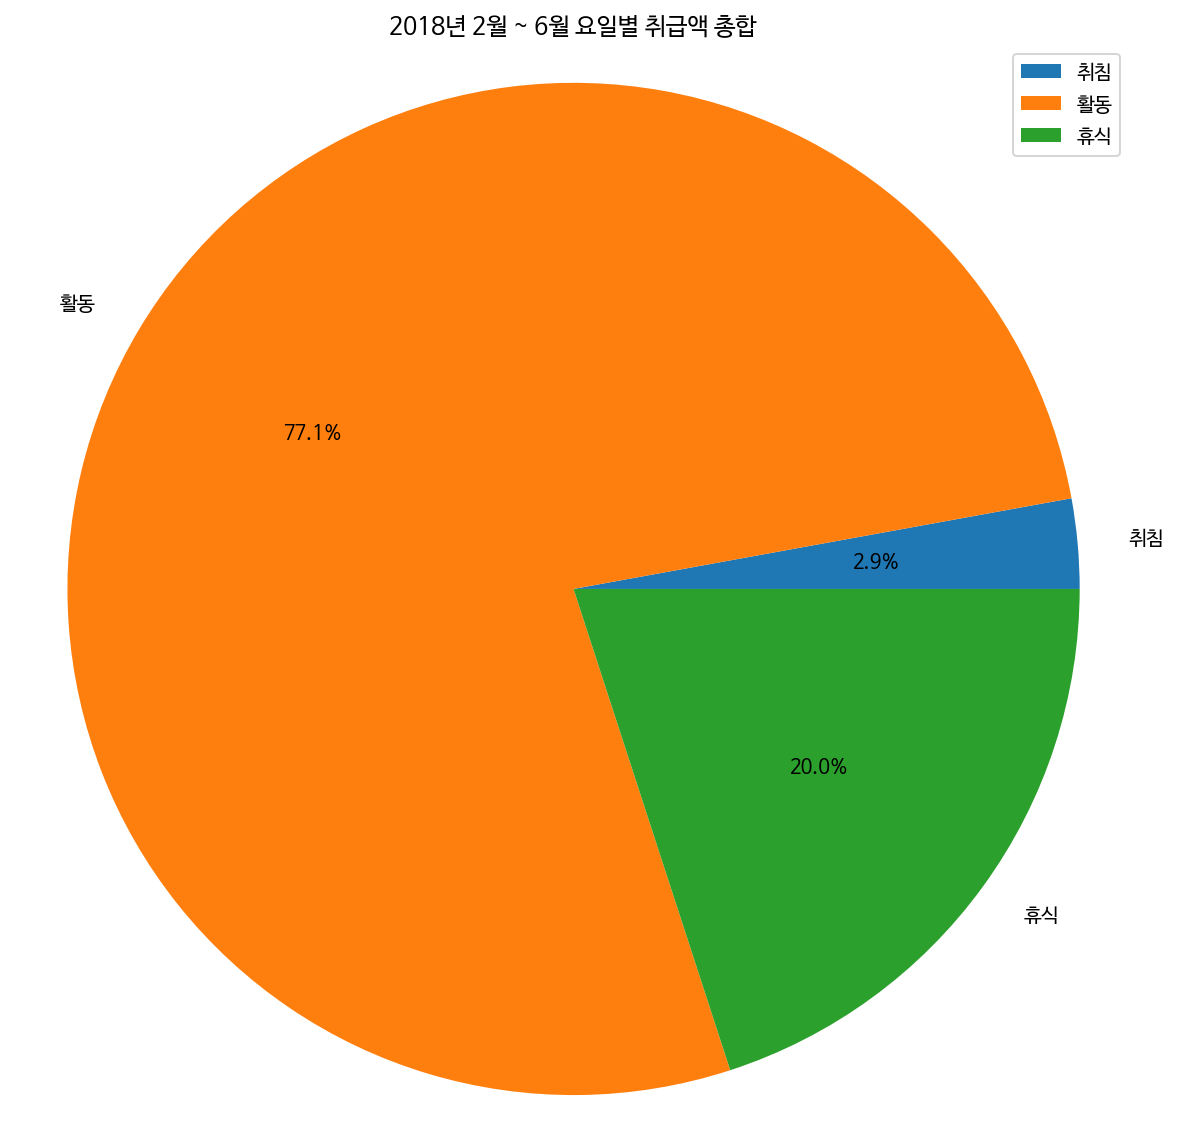

                         vlm           vlm           vlm
apv_ts_dl_tm_r                                          
취침              1.172160e+11  2.225289e+11  2.178356e+11
활동              2.441485e+12  5.644684e+12  5.859831e+12
휴식              7.537719e+11  1.578644e+12  1.518519e+12


In [ ]:
apv_ts_dl_tm_r = df20.groupby(df20['apv_ts_dl_tm_r']).sum()

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 2월 ~ 6월 이용시간대별 취급액 총합')
plt.legend(categories)
plt.show()

apv_ts_dl_tm_r = pd.concat([apv_ts_dl_tm_r,df19.groupby(df19['apv_ts_dl_tm_r']).sum()], axis=1)

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 2월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

apv_ts_dl_tm_r = pd.concat([apv_ts_dl_tm_r,df18.groupby(df18['apv_ts_dl_tm_r']).sum()], axis=1)

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,4], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2018년 2월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

print(apv_ts_dl_tm_r.iloc[:,[0,2,4]])

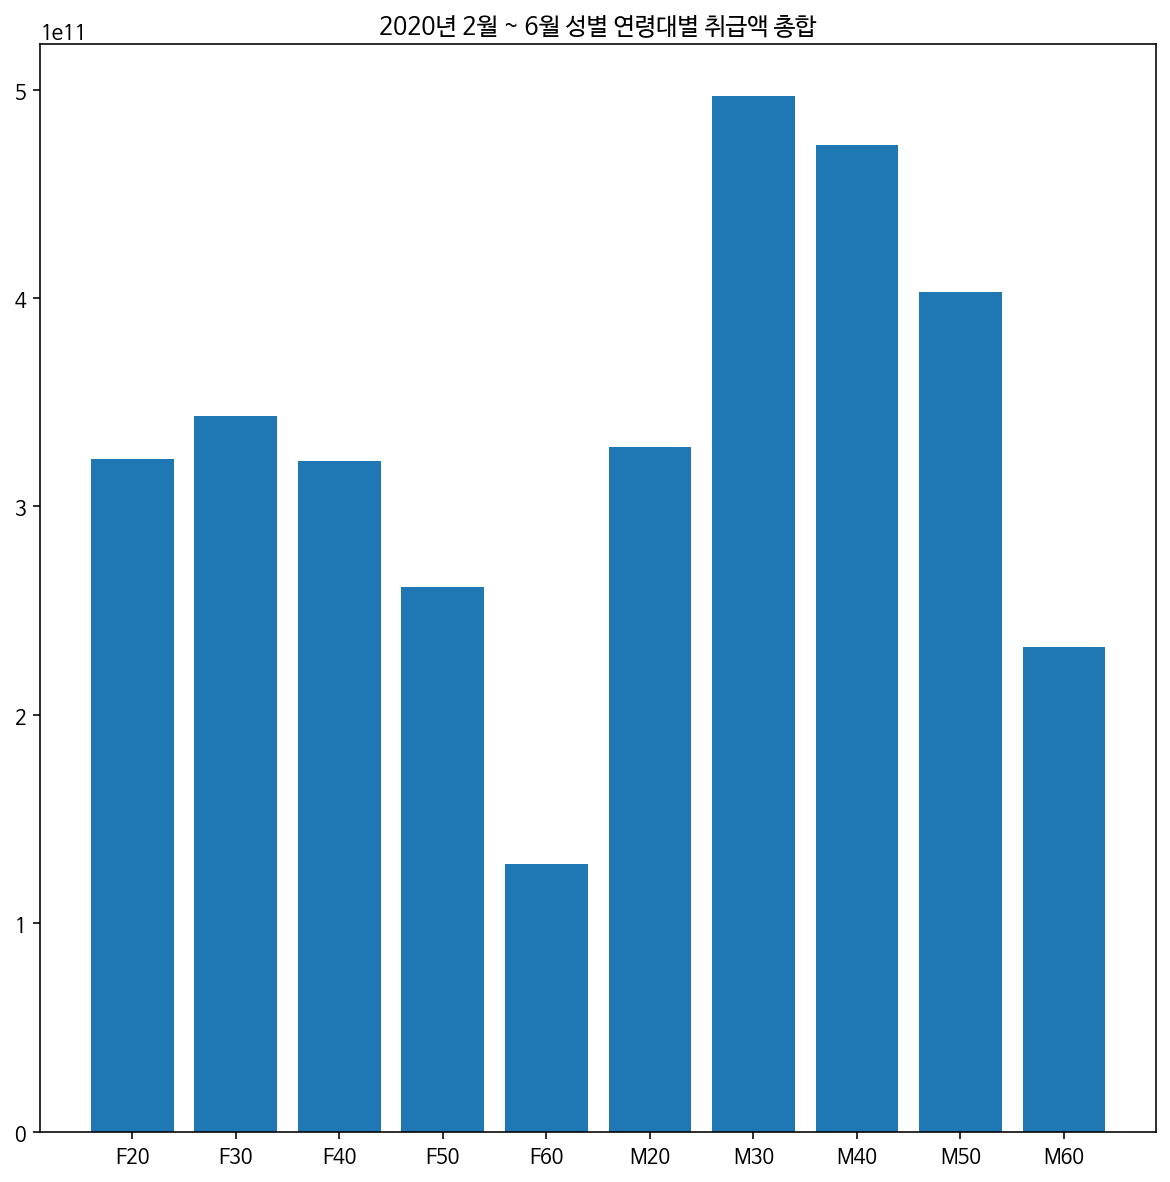

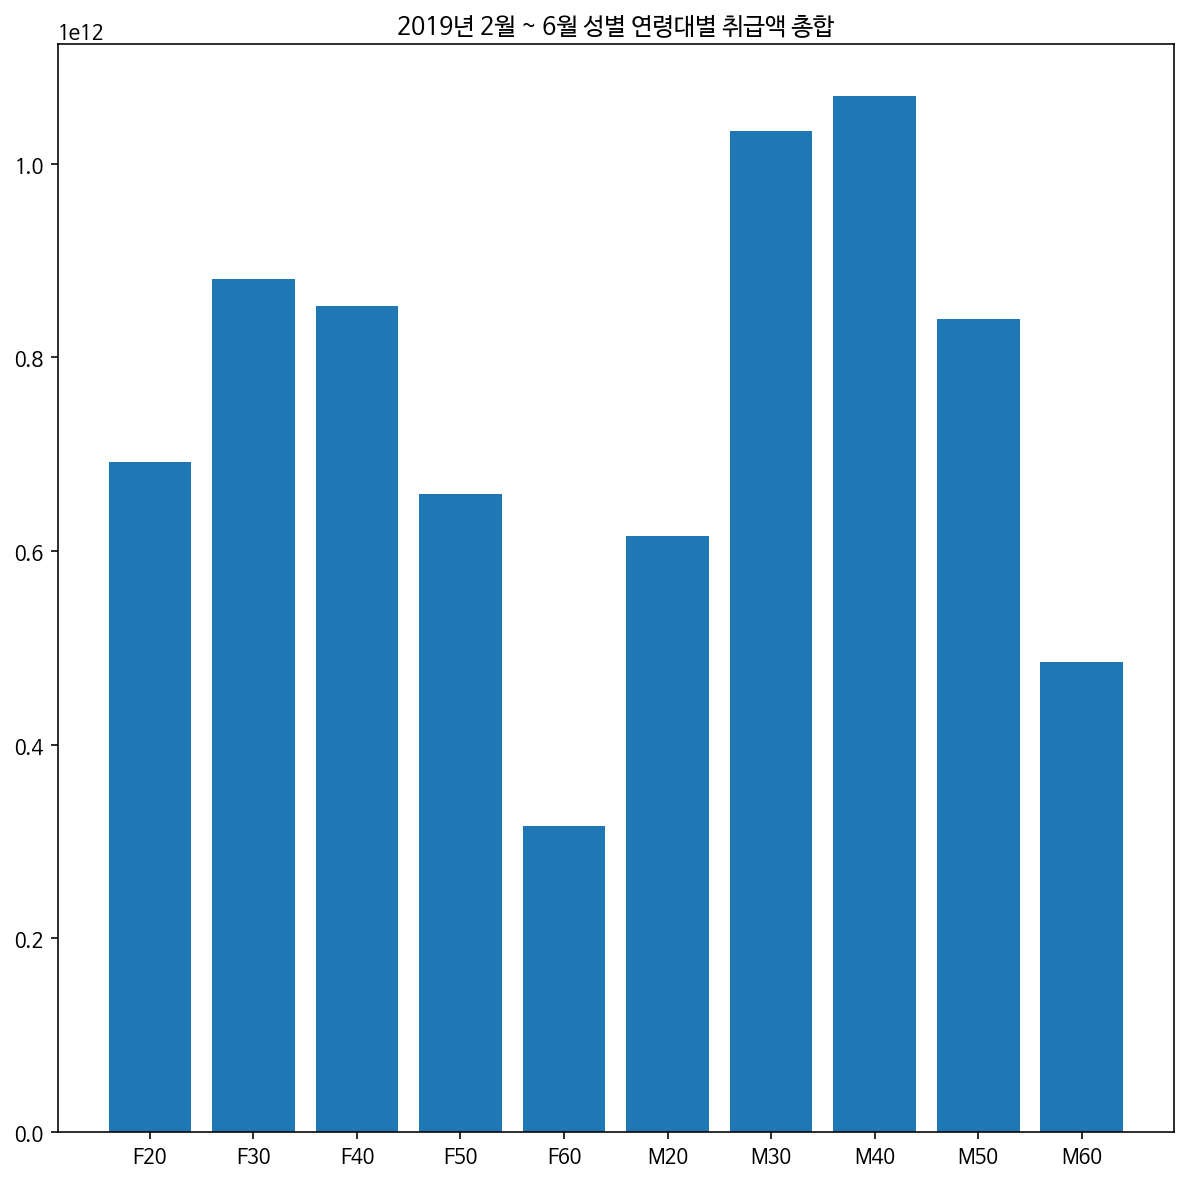

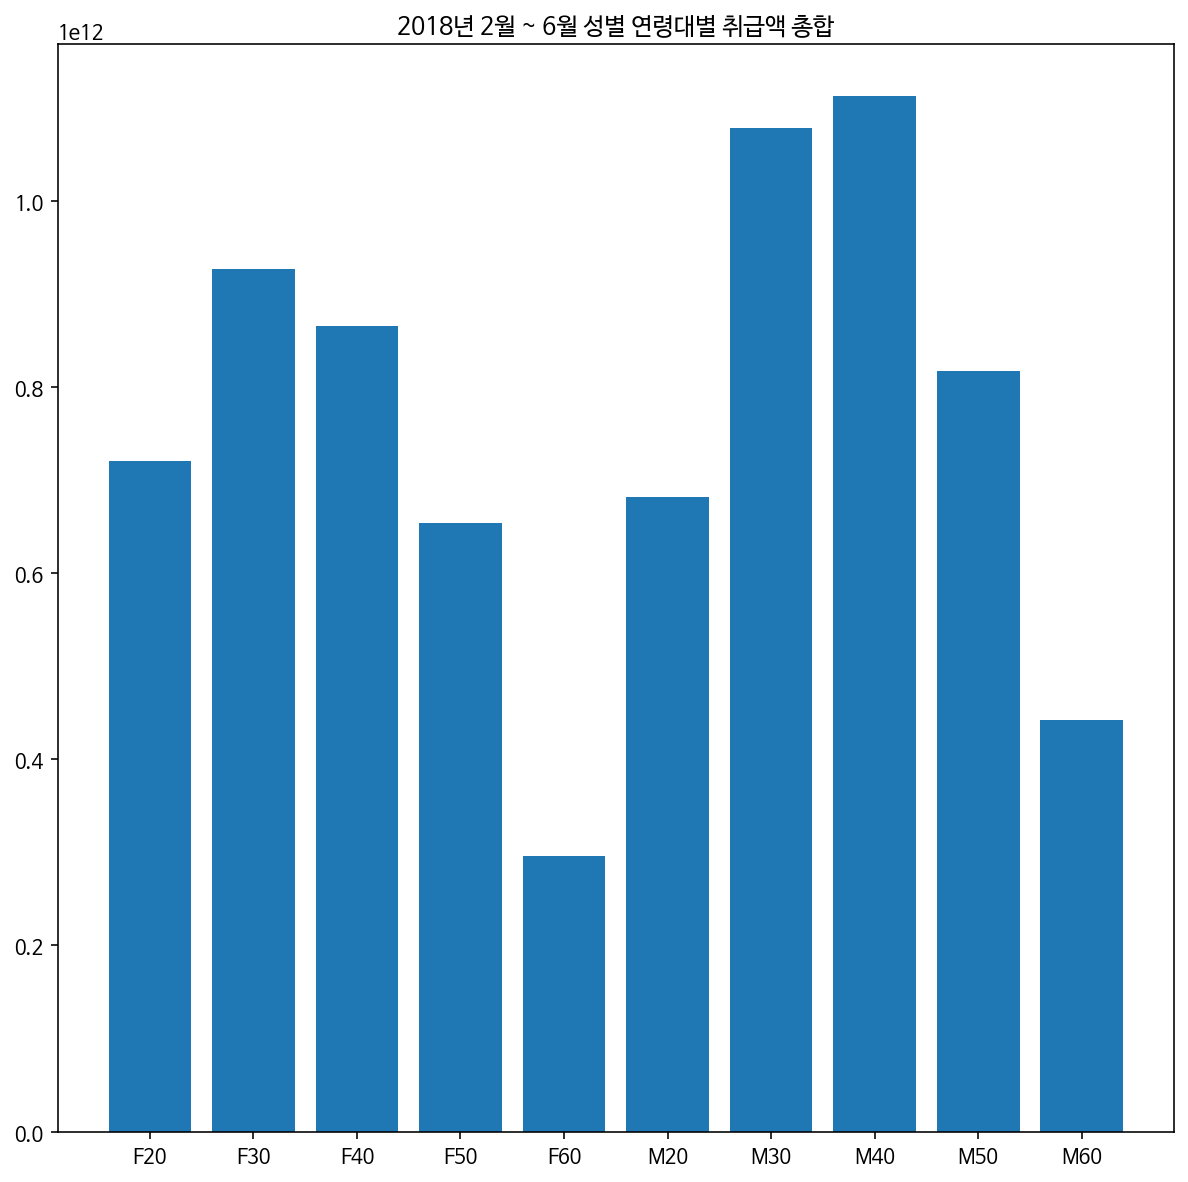

                            vlm           vlm           vlm
sex_ccd cln_age_r                                          
F       20         3.228495e+11  6.917874e+11  7.207641e+11
        30         3.435854e+11  8.805682e+11  9.267974e+11
        40         3.217214e+11  8.528159e+11  8.658045e+11
        50         2.612472e+11  6.590463e+11  6.539767e+11
        60         1.283702e+11  3.162749e+11  2.956566e+11
M       20         3.286548e+11  6.156622e+11  6.819031e+11
        30         4.969235e+11  1.034460e+12  1.078338e+12
        40         4.734381e+11  1.069963e+12  1.112676e+12
        50         4.030506e+11  8.397748e+11  8.177991e+11
        60         2.326326e+11  4.855047e+11  4.424702e+11


In [ ]:
sex_ccd_cln_age_r = df20.groupby([df20['sex_ccd'],df20['cln_age_r']]).sum()

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,0])
plt.title('2020년 2월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

sex_ccd_cln_age_r = pd.concat([sex_ccd_cln_age_r,df19.groupby([df19['sex_ccd'],df19['cln_age_r']]).sum()], axis=1)

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,2])
plt.title('2019년 2월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

sex_ccd_cln_age_r = pd.concat([sex_ccd_cln_age_r,df18.groupby([df18['sex_ccd'],df18['cln_age_r']]).sum()], axis=1)

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,4])
plt.title('2018년 2월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

print(sex_ccd_cln_age_r.iloc[:,[0,2,4]])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df20 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2020.txt", sep = "|", encoding = 'cp949')
df20 = df20[df20['ta_ym'] != 202001]
df20['ta_ym'] = df20['ta_ym']-202000
df20['cln_age_r'] = df20['cln_age_r'].astype('object')
df20['ta_ym'] = df20['ta_ym'].astype('object')
df20 = df20.rename({"vlm":"vlm20","usec":"usec20"},axis="columns")
del df20['v1']

df19 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2019.txt", sep = "|", encoding = 'cp949')
df19 = df19[df19['ta_ym'] != 201901]
df19 = df19[df19['ta_ym'] != 201907]
df19 = df19[df19['ta_ym'] != 201908]
df19 = df19[df19['ta_ym'] != 201909]
df19 = df19[df19['ta_ym'] != 201910]
df19 = df19[df19['ta_ym'] != 201911]
df19 = df19[df19['ta_ym'] != 201912]
df19['ta_ym'] = df19['ta_ym']-201900
df19['cln_age_r'] = df19['cln_age_r'].astype('object')
df19['ta_ym'] = df19['ta_ym'].astype('object')
df19 = df19.rename({"vlm":"vlm19","usec":"usec19"},axis="columns")
del df19['v1']

In [5]:
data20 = df20.groupby([df20["v2"],df20["gb3"],df20["gb2"],df20["sex_ccd"],df20["cln_age_r"],df20["ta_ym"],df20["daw_ccd_r"],df20["apv_ts_dl_tm_r"]]).sum()
data19 = df19.groupby([df19["v2"],df19["gb3"],df19["gb2"],df19["sex_ccd"],df19["cln_age_r"],df19["ta_ym"],df19["daw_ccd_r"],df19["apv_ts_dl_tm_r"]]).sum()

df = pd.merge(data20, data19, left_index=True, right_index=True, how="outer")

df = df.dropna(axis=0)

df['vlm_usec_ratio'] = (df["vlm20"]/df["usec20"])/(df["vlm19"]/df["usec19"])
df['vlm_ratio'] = (df["vlm20"]-df["vlm19"])/df["vlm19"]

df = df.reset_index()

df['cln_age_r'] = df['cln_age_r'].astype('object')
df['ta_ym'] = df['ta_ym'].astype('object')

print(df)
print("==================================================")
print(df.dtypes)
print("==================================================")
print("v2 : ",len(list(set(df['v2']))),list(set(df['v2'])))
print("gb3 : ",len(list(set(df['gb3']))),list(set(df['gb3'])))
print("gb2 : ",len(list(set(df['gb2']))),list(set(df['gb2'])))
print("sex_ccd : ",len(list(set(df['sex_ccd']))),list(set(df['sex_ccd'])))
print("cln_age_r : ",len(list(set(df['cln_age_r']))),list(set(df['cln_age_r'])))
print("ta_ym : ",len(list(set(df['ta_ym']))),list(set(df['ta_ym'])))
print("daw_ccd_r : ",len(list(set(df['daw_ccd_r']))),list(set(df['daw_ccd_r'])))
print("apv_ts_dl_tm_r : ",len(list(set(df['apv_ts_dl_tm_r']))),list(set(df['apv_ts_dl_tm_r'])))

        v2     gb3   gb2  ...  usec19 vlm_usec_ratio vlm_ratio
0       강원  문화예술활동  공연관람  ...  6124.0       1.244721 -0.016053
1       강원  문화예술활동  공연관람  ...  2706.0       1.140528 -0.300763
2       강원  문화예술활동  공연관람  ...    20.0       0.821813 -0.096005
3       강원  문화예술활동  공연관람  ...  9021.0       1.324142 -0.118706
4       강원  문화예술활동  공연관람  ...  5101.0       1.121877 -0.339102
...     ..     ...   ...  ...     ...            ...       ...
102780  충북    취미오락  패션쇼핑  ...   745.0       1.025321  0.301951
102781  충북    취미오락  패션쇼핑  ...  3479.0       0.835799  0.117362
102782  충북    취미오락  패션쇼핑  ...   230.0       0.769694  0.388795
102783  충북    취미오락  패션쇼핑  ...  5729.0       0.823586  0.598438
102784  충북    취미오락  패션쇼핑  ...   620.0       0.528654 -0.233452

[102785 rows x 14 columns]
v2                 object
gb3                object
gb2                object
sex_ccd            object
cln_age_r          object
ta_ym              object
daw_ccd_r          object
apv_ts_dl_tm_r     object
vlm20   

mean :  inf
Q1 :  0.8389062215113302
Q2 :  1.0185677594796967
Q3 :  1.2545926570604953


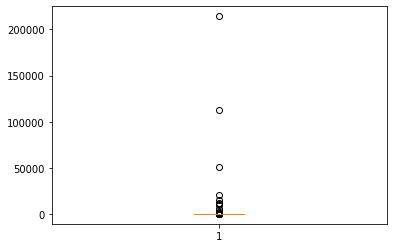

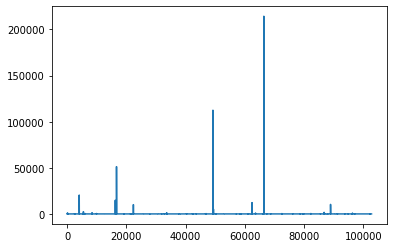

In [6]:
print("mean : ", sum(df['vlm_usec_ratio'])/len(df['vlm_usec_ratio']))

Q1 = np.percentile(df['vlm_usec_ratio'], 25)
Q2 = np.percentile(df['vlm_usec_ratio'], 50)
Q3 = np.percentile(df['vlm_usec_ratio'], 75)

print("Q1 : ",Q1)
print("Q2 : ",Q2)
print("Q3 : ",Q3)

IQR = Q3 - Q1

outlier_step = 1.5 * IQR

#df = df[df['vlm_usec_ratio'] > Q1 - outlier_step]
#df = df[df['vlm_usec_ratio'] < Q3 + outlier_step]

plt.boxplot(df['vlm_usec_ratio'])
plt.show()

plt.plot(df['vlm_usec_ratio'])
plt.show()

mean :  inf
Q1 :  -0.4925144111961942
Q2 :  -0.1917152860172432
Q3 :  0.15984891128458167


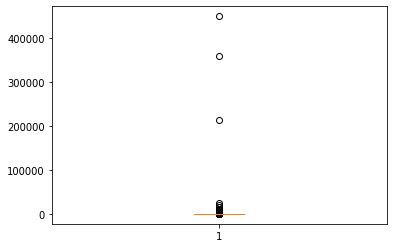

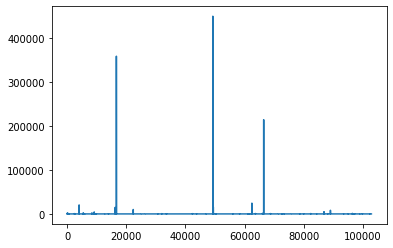

In [7]:
print("mean : ", sum(df['vlm_ratio'])/len(df['vlm_ratio']))

Q1 = np.percentile(df['vlm_ratio'], 25)
Q2 = np.percentile(df['vlm_ratio'], 50)
Q3 = np.percentile(df['vlm_ratio'], 75)

print("Q1 : ",Q1)
print("Q2 : ",Q2)
print("Q3 : ",Q3)

IQR = Q3 - Q1

outlier_step = 1.5 * IQR

#df = df[df['vlm_ratio'] > Q1 - outlier_step]
#df = df[df['vlm_ratio'] < Q3 + outlier_step]

plt.boxplot(df['vlm_ratio'])
plt.show()

plt.plot(df['vlm_ratio'])
plt.show()